In [380]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

In [381]:
#read the dataset
data = 'avocado-updated-2020.csv'
#df = pd.read_csv(data, index_col = 'geography')
df = pd.read_csv(data)
df.head(15)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington
5,1/4/2015,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington
6,1/4/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
7,1/4/2015,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise
8,1/4/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,1/4/2015,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston


In [382]:
for col in df.columns:
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[weird]) > 0:
        print(col)

In [383]:
df.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

In [384]:
# Change the 'date' column dtype from an pbject to a float for the ml model
df.astype(float).dtypes
df.info

ValueError: could not convert string to float: '1/4/2015'

In [385]:
df['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


In [387]:
# Change the 'date' column dtype from an pbject to a float for the ml model
#df['date'].astype(float)
#df.info

In [388]:
# Determine number of rows and columns
df.shape

(30021, 13)

In [389]:
#Determine if there is duplicated data
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


In [390]:
#Determine the distribution of the data in the geography column 
local_counts = df.geography.value_counts()
local_counts

Plains                  556
Indianapolis            556
New York                556
Seattle                 556
Dallas/Ft. Worth        556
Pittsburgh              556
Louisville              556
Charlotte               556
Cincinnati/Dayton       556
Northeast               556
Orlando                 556
Baltimore/Washington    556
Houston                 556
Columbus                556
Grand Rapids            556
Boise                   556
Northern New England    556
South Carolina          556
Los Angeles             556
Richmond/Norfolk        556
Philadelphia            556
West                    556
Miami/Ft. Lauderdale    556
Tampa                   556
Roanoke                 556
San Diego               556
Albany                  556
Southeast               556
Chicago                 556
San Francisco           556
California              556
Jacksonville            556
Portland                556
Buffalo/Rochester       556
New Orleans/Mobile      556
Nashville           

In [391]:
#Determine the features of the training set by seeing the correlations to each column
df.corr()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
average_price,1.000000,-0.184255,-0.203079,-0.161584,-0.171439,-0.165742,-0.167315,-0.153199,-0.105359,-0.011460
total_volume,-0.184255,1.000000,0.976503,0.953720,0.861139,0.955636,0.972365,0.857310,0.735133,0.033126
4046,-0.203079,0.976503,1.000000,0.917269,0.839122,0.902623,0.927221,0.794043,0.667539,0.007287
4225,-0.161584,0.953720,0.917269,1.000000,0.877696,0.845508,0.884774,0.713055,0.597591,-0.016295
4770,-0.171439,0.861139,0.839122,0.877696,1.000000,0.759560,0.792079,0.640577,0.605428,-0.027676
total_bags,-0.165742,0.955636,0.902623,0.845508,0.759560,1.000000,0.987919,0.951869,0.835809,0.098003
small_bags,-0.167315,0.972365,0.927221,0.884774,0.792079,0.987919,1.000000,0.893344,0.803242,0.079293
large_bags,-0.153199,0.857310,0.794043,0.713055,0.640577,0.951869,0.893344,1.000000,0.816688,0.125919
xlarge_bags,-0.105359,0.735133,0.667539,0.597591,0.605428,0.835809,0.803242,0.816688,1.000000,0.118915
year,-0.011460,0.033126,0.007287,-0.016295,-0.027676,0.098003,0.079293,0.125919,0.118915,1.000000


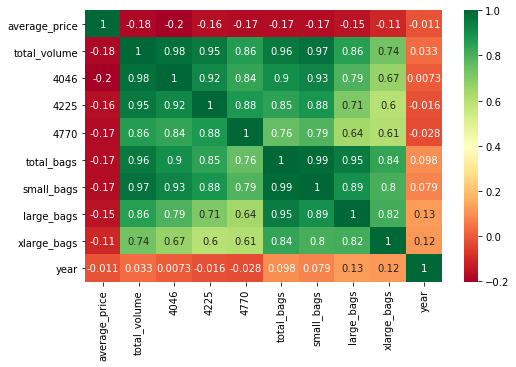

In [392]:
#Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [393]:
#From the heatmap above I can tell the date column is not needed
del df['date']

In [394]:
#From the heatmap above I can tell the 'type' column is not included so it needs to be converted.
df.type.map(dict(conventional=1, organic=0))
df = df.replace(to_replace="conventional", value="1")
df = df.replace(to_replace="organic", value="0")
df1.head()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,1,2015,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,0,2015,0
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,1,2015,1
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,0,2015,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,1,2015,2


In [395]:
#Check again... the features of the training set by seeing the correlations to each column
df.corr()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
average_price,1.000000,-0.184255,-0.203079,-0.161584,-0.171439,-0.165742,-0.167315,-0.153199,-0.105359,-0.011460
total_volume,-0.184255,1.000000,0.976503,0.953720,0.861139,0.955636,0.972365,0.857310,0.735133,0.033126
4046,-0.203079,0.976503,1.000000,0.917269,0.839122,0.902623,0.927221,0.794043,0.667539,0.007287
4225,-0.161584,0.953720,0.917269,1.000000,0.877696,0.845508,0.884774,0.713055,0.597591,-0.016295
4770,-0.171439,0.861139,0.839122,0.877696,1.000000,0.759560,0.792079,0.640577,0.605428,-0.027676
total_bags,-0.165742,0.955636,0.902623,0.845508,0.759560,1.000000,0.987919,0.951869,0.835809,0.098003
small_bags,-0.167315,0.972365,0.927221,0.884774,0.792079,0.987919,1.000000,0.893344,0.803242,0.079293
large_bags,-0.153199,0.857310,0.794043,0.713055,0.640577,0.951869,0.893344,1.000000,0.816688,0.125919
xlarge_bags,-0.105359,0.735133,0.667539,0.597591,0.605428,0.835809,0.803242,0.816688,1.000000,0.118915
year,-0.011460,0.033126,0.007287,-0.016295,-0.027676,0.098003,0.079293,0.125919,0.118915,1.000000


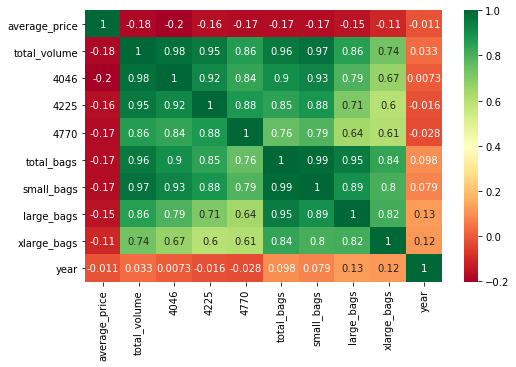

In [396]:
#Check again... Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [397]:
# Drop the geography columns that summarize the data already found in the cities...
#df.drop(df.loc[df['geography']== 'California'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Northeast'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'South Central'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Plains'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Northern New England'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Total U.S.'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'West'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Southeast'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Houston'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Tampa'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Las Vegas'].index, inplace=True)
df.head(20)

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,Albany
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,Albany
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,Atlanta
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,Atlanta
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,Baltimore/Washington
5,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,0,2015,Baltimore/Washington
6,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,1,2015,Boise
7,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,0,2015,Boise
8,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,1,2015,Boston
9,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,0,2015,Boston


In [398]:
#train the data by putting the average_price in the y axis and all other columns in the x axis
#X=df.drop('average_price',1)
#y=df['average_price']
X=df.drop('geography',1)
y=df['geography']

In [399]:
# print the shape of an 80/20 train test split over the dataset
print('shape of X and y :',X.shape,y.shape)

shape of X and y : (30021, 11) (30021,)


In [400]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [401]:
print('shape of X and y (train) :',X_train.shape,y_train.shape)
print('shape of X and y (test) :',X_test.shape,y_test.shape)

shape of X and y (train) : (24016, 11) (24016,)
shape of X and y (test) : (6005, 11) (6005,)


In [402]:
#Encode the catagorical columns for use in the ml model
le = LabelEncoder()
df['geography'] = le.fit_transform(df['geography'])

In [403]:
le = LabelEncoder()
df['type'] = label.fit_transform(df['type'])
df

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,0
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,1
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30016,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,0,2020,51
30017,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,1,2020,52
30018,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,0,2020,52
30019,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,1,2020,53


In [404]:
df.geography.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [405]:
# Determine which columns ar not contributing a pattern or key for the best accuracy
scaler=VarianceThreshold(0.1)

In [406]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [407]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (24016, 11)
shape of X (test) : (6005, 11)


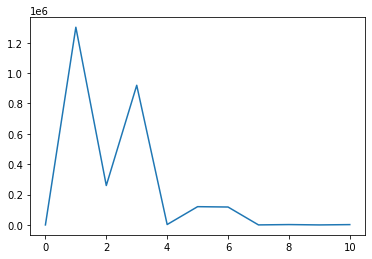

In [408]:
#Scale and Normalize the data (Check ths out)
plt.plot(X_train[0])

In [409]:
scaler=StandardScaler()

In [410]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [411]:
df_scaled = scaler.fit_transform(df)[:5]
df_scaled

array([[-0.44823404, -0.23558197, -0.22984321, -0.21950471, -0.21383359,
        -0.22874991, -0.23455208, -0.20260108, -0.16316857,  0.99990007,
        -1.40444125, -1.70025812],
       [ 1.04649407, -0.24593985, -0.23198587, -0.24356982, -0.21432806,
        -0.23479247, -0.24299436, -0.20373449, -0.16316857, -1.00009994,
        -1.40444125, -1.70025812],
       [-1.02514664, -0.13222473,  0.05057461, -0.2233251 , -0.21351402,
        -0.20254232, -0.22664012, -0.13928998, -0.16316857,  0.99990007,
        -1.40444125, -1.63609103],
       [ 0.96782417, -0.24529143, -0.23086668, -0.2428988 , -0.21432806,
        -0.23461902, -0.24309042, -0.20301351, -0.16316857, -1.00009994,
        -1.40444125, -1.63609103],
       [-0.81536024, -0.03965683, -0.19015014,  0.22924821,  0.18198747,
        -0.13591245, -0.09992726, -0.19519299, -0.16316857,  0.99990007,
        -1.40444125, -1.57192393]])

In [412]:
# Verify that the mean of each column is 0 and its standard deviation is 1
print(np.mean(df_scaled[:,0]))
print(np.std(df_scaled[:,0]))

-0.05488453481821496
0.8869524924893911


In [413]:
# Change the dataframe into a numpy ndarray
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


In [414]:
#Convert the ndarray into a pandas dataframe
X_train=pd.DataFrame(X_train)
X_train.head()
X_test=pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.186365,0.055199,-0.049008,-0.111742,-0.180626,0.303629,-0.007635,0.931759,0.189502,1.003253,1.783917
1,-0.055924,-0.246092,-0.232280,-0.242477,-0.213917,-0.235502,-0.244398,-0.202073,-0.164034,-0.996757,-0.127673
2,3.361689,-0.245741,-0.232321,-0.241107,-0.213890,-0.235666,-0.241992,-0.207563,-0.164034,-0.996757,-0.764870
3,0.022944,-0.244948,-0.226399,-0.243686,-0.213917,-0.236799,-0.243619,-0.207665,-0.164034,-0.996757,-0.127673
4,0.811624,0.158351,-0.105182,-0.003122,-0.194442,0.545929,0.719578,0.195792,-0.162916,-0.996757,0.509524


In [415]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [416]:
actr=[]
acts=[]
lstr=[]
lsts=[]

In [417]:
#Create a RandomForest pipeline
rf = RandomForestRegressor(random_state=0)

In [418]:
rf.fit(X_train,y_train)
y_tr1=rf.predict(X_train)
y_pr=rf.predict(X_test)

print('train data accuracy :',rf.score(X_train,y_train))
print('test data accuracy :',rf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

ValueError: could not convert string to float: 'San Francisco'

In [355]:
actr.append(rf.score(X_train,y_train))
acts.append(rf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

In [356]:
#Evaluation
model = ['Random Forest']

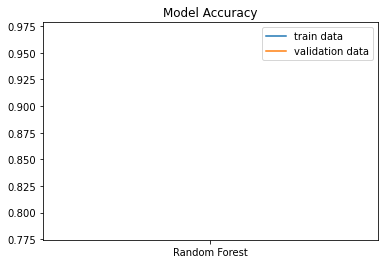

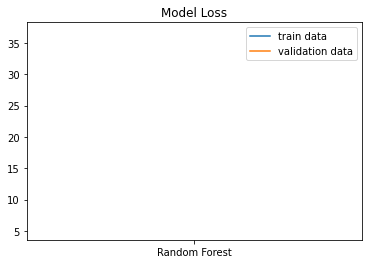

In [357]:
plt.title('Model Accuracy')
plt.plot(model,actr,label='train data')
plt.plot(model,acts,label='validation data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(model,lstr,label='train data')
plt.plot(model,lsts,label='validation data')
plt.legend()
plt.show()